In [1]:
%load_ext autoreload
%autoreload 2

In [4]:
import sys
sys.path.append('..')

In [5]:
from foottraffic.awb_model.models.dataloading import MFF, MetaData
from foottraffic.awb_model.types.distribution_types import ContDist, PosDist, ContUniDist, Distribution
from foottraffic.awb_model.models.variablemodels import VariableDetails, MediaVariableDetails, ControlVariableDetails, ExogVariableDetails
from foottraffic.awb_model.models.transformsmodel import DeterministicTransform
from foottraffic.awb_model.models.model import FoottrafficModel
from foottraffic.awb_model.models.priormodel import SShapedPrior, HillPrior

from foottraffic.bayes.media_transforms import shape, adstock

import pymc as pm
import matplotlib.pyplot as plt
import numpy as np
import pytensor.tensor as pt
import arviz as az
import xarray as xr
import pandas as pd

In [55]:
ft_model = FoottrafficModel.load('../complex_model')

In [42]:
#geo_fixed_effects = np.abs(np.random.randn(10)*.2)
#product_mixed_effects = np.abs(np.random.randn(5)*.2)
#obs = (geo_fixed_effects[:, None, None] + product_mixed_effects[None, :, None])*ft_model.variable_details[0].as_numpy(ft_model.data) + np.random.randn(10, 5, 156)[None, None, :]*2

In [48]:
#from foottraffic.awb_model.transforms import hill

In [49]:
#df = ft_model.data.as_df()

In [50]:
#media_effect = .05 * hill(df.loc[df['VariableName']=="media_var_0", "VariableValue"].values.reshape(10, 5, -1), 1.2, 2).reshape(-1)
#promotion_effect = ((geo_fixed_effects[:, None, None] + product_mixed_effects[None, :, None])*df.loc[df['VariableName']=="Promotion", "VariableValue"].values.reshape(10, 5, -1)).reshape(-1)

In [51]:
#max(promotion_effect)

2.4231767101504453

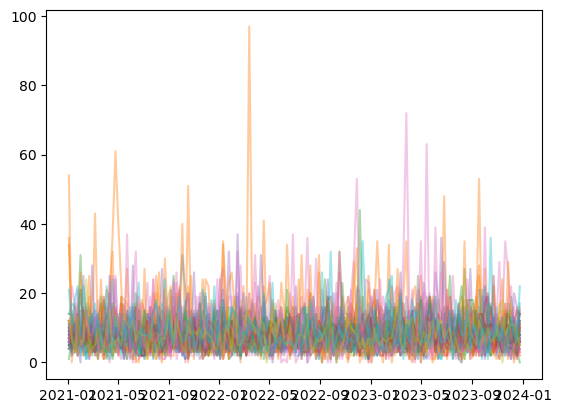

In [52]:
#plt.plot(pd.date_range("2021-01-01", periods=156, freq="W-MON"), np.random.poisson(np.exp(media_effect + promotion_effect+2)).reshape(-1, 156).T, alpha=.4);

In [53]:
#df = ft_model.data.as_df()
#df.loc[df['VariableName']=="Stock", "VariableValue"] = np.random.poisson(np.exp(media_effect + promotion_effect+2))

In [54]:
#df.to_csv('../complex_model/data/data.csv', index=False)

In [35]:
#geo_fixed_effects

array([0.69820933, 1.45025914, 0.08300977, 0.93099466, 0.39942319,
       0.02851244, 0.23521417, 0.388154  , 1.13246205, 0.31113994])

In [36]:
#(geo_fixed_effects[:, None] + product_mixed_effects[None, :])

array([[0.71553093, 0.75783398, 0.81956848, 0.88255116, 0.88596285],
       [1.46758074, 1.50988379, 1.57161829, 1.63460097, 1.63801265],
       [0.10033137, 0.14263442, 0.20436892, 0.2673516 , 0.27076329],
       [0.94831626, 0.99061931, 1.0523538 , 1.11533649, 1.11874817],
       [0.41674479, 0.45904784, 0.52078234, 0.58376502, 0.5871767 ],
       [0.04583404, 0.08813709, 0.14987159, 0.21285427, 0.21626596],
       [0.25253577, 0.29483882, 0.35657332, 0.419556  , 0.42296769],
       [0.4054756 , 0.44777865, 0.50951315, 0.57249583, 0.57590751],
       [1.14978365, 1.1920867 , 1.25382119, 1.31680388, 1.32021556],
       [0.32846154, 0.37076459, 0.43249909, 0.49548177, 0.49889346]])

In [56]:
ft_model.fit(overwrite=True)

['Geography', 'Product', 'Period']
['Geography', 'Product', 'Period']


Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [intercept_fixed_coeff, media_var_0_Total_Total_Total_fixed_coeff, media_var_0_Total_Total_Total_K_, media_var_0_Total_Total_Total_n_, Promotion_Total_Total_Total_fixed_coeff, Promotion_Total_Total_Total_rand_coeff_sigma, Promotion_Total_Total_Total_rand_coeff]


/Users/mreda/miniconda3/envs/foottraffic/lib/python3.11/site-packages/rich/live.py:231: UserWarning: install 
"ipywidgets" for Jupyter support
  warnings.warn('install "ipywidgets" for Jupyter support')

Sampling 4 chains for 1_000 tune and 1_000 draw iterations (4_000 + 4_000 draws total) took 53 seconds.


In [57]:
ft_model.get_var_con("intercept")

Geography   Product     Period  intercept_contribution
0           AU  Desktops 2020-04-06                2.025722
1           AU  Desktops 2020-04-13                2.025722
2           AU  Desktops 2020-04-20                2.025722
3           AU  Desktops 2020-04-27                2.025722
4           AU  Desktops 2020-05-04                2.025722
...        ...       ...        ...                     ...
7795        US   Watches 2023-02-27                2.025722
7796        US   Watches 2023-03-06                2.025722
7797        US   Watches 2023-03-13                2.025722
7798        US   Watches 2023-03-20                2.025722
7799        US   Watches 2023-03-27                2.025722

[7800 rows x 4 columns]

In [58]:
ft_model.trace

Inference data with groups:
	> posterior
	> sample_stats
	> observed_data
	> constant_data

In [59]:
ft_model.variable_details

[ControlVariableDetails(variable_name='Promotion_Total_Total_Total', variable_type='control', deterministic_transform=DeterministicTransform(functional_form=<FunctionalForms.linear: 'linear'>, params=None), normalization=<Normilization.none: 'none'>, std=None, mean=None, time_transform=None, sign=None, partial_pooling_sigma=1.0, coeff_prior=ControlCoeffPrior(coeff_dist=<Distribution.normal: 'Normal'>, coeff_params={'mu': 0.0, 'sigma': 3.0}), fixed_ind_coeff_dims=None, random_coeff_dims=['Geography', 'Product']),
 MediaVariableDetails(variable_name='media_var_0_Total_Total_Total', variable_type='media', deterministic_transform=DeterministicTransform(functional_form=<FunctionalForms.linear: 'linear'>, params=None), normalization=<Normilization.none: 'none'>, std=None, mean=None, time_transform=None, sign='positive', partial_pooling_sigma=1.0, adstock=<Adstock.delayed: 'delayed'>, media_transform=<MediaTransform.hill: 'hill'>, coeff_prior=MediaCoeffPrior(coeff_dist=<PosDist.lognormal: 'Lo

In [60]:
ft_model.save('../complex_model')

/Users/mreda/miniconda3/envs/foottraffic/lib/python3.11/site-packages/pydantic/main.py:352: UserWarning: Pydantic serializer warnings:
  Expected `tuple[literal['Geography','Period','Product','Outlet','Campaign','Creative'], ...]` but got `list` - serialized value may not be as expected
  return self.__pydantic_serializer__.to_json(


array([[<Axes: title={'center': 'media_var_0_Total_Total_Total_coeff_estimate'}>,
        <Axes: title={'center': 'media_var_0_Total_Total_Total_coeff_estimate'}>]],
      dtype=object)

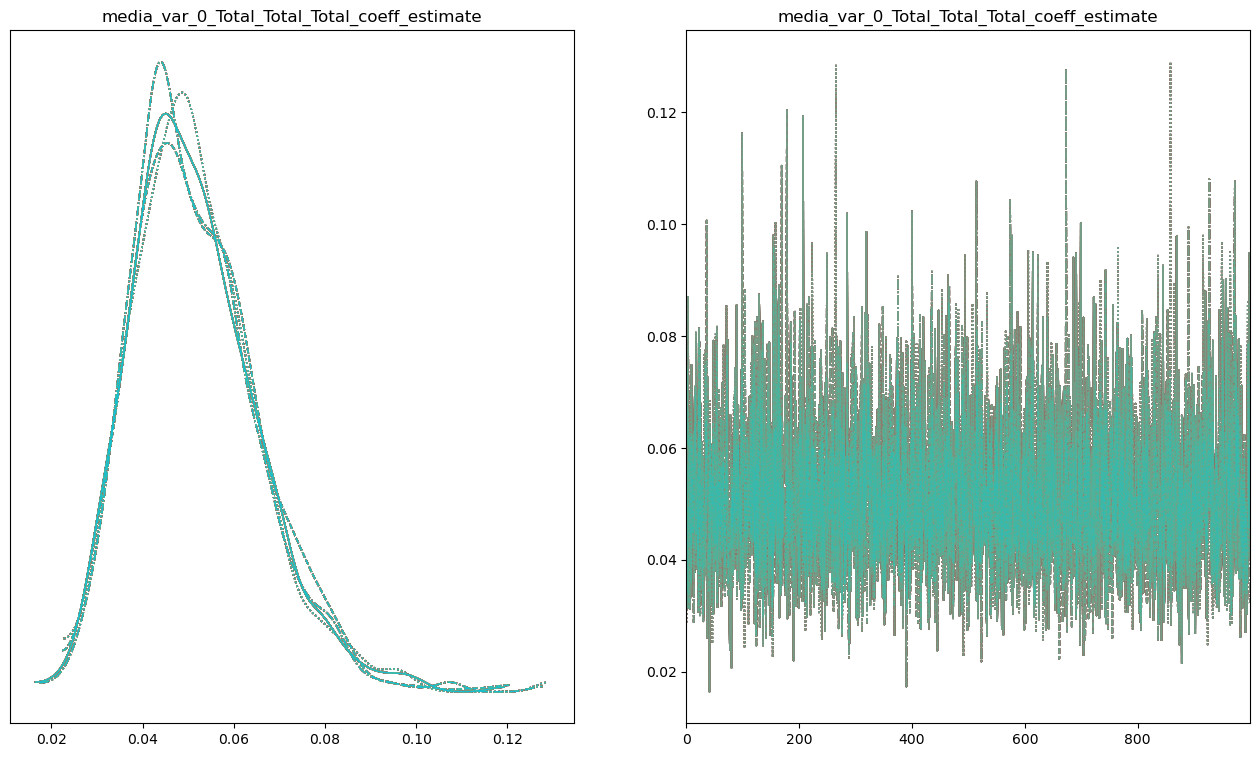

In [61]:
ft_model.check_prior("media_var_0_Total_Total_Total")

In [62]:
posterior = ft_model.get_posterior_predictive()

['Geography', 'Product', 'Period']
['Geography', 'Product', 'Period']


/Users/mreda/Downloads/FootTrafficModel/archive/../foottraffic/awb_model/models/model.py:198: UserWarning: The effect of Potentials on other parameters is ignored during posterior predictive sampling. This is likely to lead to invalid or biased predictive samples.
  posterior = pm.sample_posterior_predictive(self.trace)
Sampling: [Stock_Total_Total_Total_likelihood]


/Users/mreda/miniconda3/envs/foottraffic/lib/python3.11/site-packages/rich/live.py:231: UserWarning: install 
"ipywidgets" for Jupyter support
  warnings.warn('install "ipywidgets" for Jupyter support')

In [63]:
avm = ft_model.avm()

['Geography', 'Product', 'Period']
['Geography', 'Product', 'Period']


/Users/mreda/Downloads/FootTrafficModel/archive/../foottraffic/awb_model/models/model.py:198: UserWarning: The effect of Potentials on other parameters is ignored during posterior predictive sampling. This is likely to lead to invalid or biased predictive samples.
  posterior = pm.sample_posterior_predictive(self.trace)
Sampling: [Stock_Total_Total_Total_likelihood]


/Users/mreda/miniconda3/envs/foottraffic/lib/python3.11/site-packages/rich/live.py:231: UserWarning: install 
"ipywidgets" for Jupyter support
  warnings.warn('install "ipywidgets" for Jupyter support')

In [67]:
contributions_df = ft_model.get_contributions()
contributions_df.head()

Geography   Product     Period  intercept_contribution  \
0           AU  Desktops 2020-04-06                2.025722   
1           AU  Desktops 2020-04-13                2.025722   
2           AU  Desktops 2020-04-20                2.025722   
3           AU  Desktops 2020-04-27                2.025722   
4           AU  Desktops 2020-05-04                2.025722   
...        ...       ...        ...                     ...   
7795        US   Watches 2023-02-27                2.025722   
7796        US   Watches 2023-03-06                2.025722   
7797        US   Watches 2023-03-13                2.025722   
7798        US   Watches 2023-03-20                2.025722   
7799        US   Watches 2023-03-27                2.025722   

      Promotion_Total_Total_Total_contribution  \
0                                     0.344868   
1                                     0.240356   
2                                    -0.356210   
3                                    -0.214124   
4                                     0.070451   
...                                        ...   
7795                                  0.260023   
7796                                  0.360869   
7797                                  0.447435   
7798                                  0.583438   
7799                                  0.177134   

      media_var_0_Total_Total_Total_contribution  
0                                       0.003086  
1                                       0.035639  
2                                       0.007736  
3                                       0.003842  
4                                       0.007325  
...                                          ...  
7795                                    0.036211  
7796                                    0.012963  
7797                                    0.003576  
7798                                    0.002382  
7799                                    0.043145  

[7800 rows x 6 columns]

In [74]:
ft_model.data.analytic_dataframe()

Geography   Product     Period  Competition_Total_Total_Total  \
0           AU  Desktops 2020-04-06                      -0.668955   
1           AU  Desktops 2020-04-13                      -0.958664   
2           AU  Desktops 2020-04-20                       0.577616   
3           AU  Desktops 2020-04-27                      -1.750890   
4           AU  Desktops 2020-05-04                       0.197452   
...        ...       ...        ...                            ...   
7795        US   Watches 2023-02-27                       0.009803   
7796        US   Watches 2023-03-06                       0.346982   
7797        US   Watches 2023-03-13                       0.952847   
7798        US   Watches 2023-03-20                       1.518658   
7799        US   Watches 2023-03-27                      -0.773603   

      Price_Total_Total_Total  Promotion_Total_Total_Total  \
0                    0.174888                     1.041951   
1                    0.054043                     0.726187   
2                    0.203846                    -1.076217   
3                   -1.369900                    -0.646932   
4                    0.367659                     0.212854   
...                       ...                          ...   
7795                -1.251119                     0.687701   
7796                -1.115422                     0.954418   
7797                -0.523646                     1.183366   
7798                 0.923874                     1.543061   
7799                 0.495512                     0.468479   

      Sales_Total_Total_Total  Stock_Total_Total_Total  \
0                    0.051555                     14.0   
1                    1.153100                      5.0   
2                    0.791275                      5.0   
3                    0.174080                      6.0   
4                   -0.680308                     10.0   
...                       ...                      ...   
7795                 0.340862                      9.0   
7796                 0.119147                     12.0   
7797                -0.933052                     13.0   
7798                 0.075584                     11.0   
7799                 1.169309                      6.0   

      media_var_0_Total_Total_Total  media_var_1_Total_Total_Total  ...  \
0                          2.116320                      -0.279096  ...   
1                         14.524069                      -0.105823  ...   
2                          4.238416                      -0.877859  ...   
3                          2.504433                      -0.087381  ...   
4                          4.069366                      -0.265654  ...   
...                             ...                            ...  ...   
7795                      15.220121                      -0.490360  ...   
7796                       6.404317                       0.175055  ...   
7797                       2.438720                      -1.111797  ...   
7798                       1.778151                       0.364020  ...   
7799                      19.652944                       0.445170  ...   

      media_var_13_Total_Total_Total  media_var_14_Total_Total_Total  \
0                           1.146531                       -0.400975   
1                          -1.879932                       -1.924272   
2                          -0.749242                       -0.702007   
3                           1.496944                       -1.768853   
4                          -1.638682                        0.080596   
...                              ...                             ...   
7795                       -1.124936                        0.073830   
7796                        1.265119                        1.119824   
7797                       -1.020674                        0.354898   
7798                       -1.277011                        0.569309   
7799                        0

In [76]:
avm = ft_model.avm()

['Geography', 'Product', 'Period']
['Geography', 'Product', 'Period']


/Users/mreda/Downloads/FootTrafficModel/archive/../foottraffic/awb_model/models/model.py:195: UserWarning: The effect of Potentials on other parameters is ignored during posterior predictive sampling. This is likely to lead to invalid or biased predictive samples.
  
Sampling: [Stock_Total_Total_Total_likelihood]


/Users/mreda/miniconda3/envs/foottraffic/lib/python3.11/site-packages/rich/live.py:231: UserWarning: install 
"ipywidgets" for Jupyter support
  warnings.warn('install "ipywidgets" for Jupyter support')

In [78]:
avm.head()

Geography   Product     Period  Stock_Total_Total_Total  \
0        AU  Desktops 2020-04-06                     14.0   
1        AU  Desktops 2020-04-13                      5.0   
2        AU  Desktops 2020-04-20                      5.0   
3        AU  Desktops 2020-04-27                      6.0   
4        AU  Desktops 2020-05-04                     10.0   

   Stock_Total_Total_Total_likelihood         mu  
0                            10.83675  10.739946  
1                             9.97425   9.992852  
2                             5.39825   5.352524  
3                             6.16475   6.144556  
4                             8.14625   8.194980

In [77]:
np.exp(contributions_df.sum(axis=1, numeric_only=True))

0       10.736789
1        9.991320
2        5.350811
3        6.143778
4        8.194779
          ...    
7795    10.195589
7796    11.018261
7797    11.902319
7798    13.620028
7799     9.449867
Length: 7800, dtype: float64

In [152]:
avm.head()

Geography   Product     Period  Stock_Total_Total_Total  \
0        AU  Desktops 2020-04-06                     14.0   
1        AU  Desktops 2020-04-13                      7.0   
2        AU  Desktops 2020-04-20                      2.0   
3        AU  Desktops 2020-04-27                      4.0   
4        AU  Desktops 2020-05-04                      5.0   

   Stock_Total_Total_Total_likelihood         mu  
0                            10.77825  10.784448  
1                             9.94700   9.922876  
2                             5.20800   5.240293  
3                             6.02100   6.034896  
4                             8.20200   8.165448

In [150]:
ft_model.trace.posterior['mu'].to_dataframe()

mu
chain draw Geography Product  Period               
0     0    AU        Desktops 2020-04-06  11.129050
                              2020-04-13  10.090525
                              2020-04-20   5.124345
                              2020-04-27   5.974747
                              2020-05-04   8.244189
...                                             ...
3     999  US        Watches  2023-02-27  10.268965
                              2023-03-06  11.160623
                              2023-03-13  11.910884
                              2023-03-20  13.704461
                              2023-03-27   9.434137

[31200000 rows x 1 columns]

In [140]:
ft_model.trace.to_netcdf('trace.nc')

'trace.nc'

In [143]:
az.from_netcdf('trace.nc')

Inference data with groups:
	> posterior
	> sample_stats
	> observed_data
	> constant_data

In [79]:
az.plot_ppc?

Signature:
az.plot_ppc(
    data,
    kind='kde',
    alpha=None,
    mean=True,
    observed=None,
    observed_rug=False,
    color=None,
    colors=None,
    grid=None,
    figsize=None,
    textsize=None,
    data_pairs=None,
    var_names=None,
    filter_vars=None,
    coords=None,
    flatten=None,
    flatten_pp=None,
    num_pp_samples=None,
    random_seed=None,
    jitter=None,
    animated=False,
    animation_kwargs=None,
    legend=True,
    labeller=None,
    ax=None,
    backend=None,
    backend_kwargs=None,
    group='posterior',
    show=None,
)
Docstring:
Plot for posterior/prior predictive checks.

Parameters
----------
data : InferenceData
    :class:`arviz.InferenceData` object containing the observed and posterior/prior
    predictive data.
kind : str, default "kde"
    Type of plot to display ("kde", "cumulative", or "scatter").
alpha : float, optional
    Opacity of posterior/prior predictive density curves.
    Defaults to 0.2 for ``kind = kde`` and cumulativ

In [88]:
posterior

Inference data with groups:
	> posterior_predictive
	> observed_data
	> constant_data

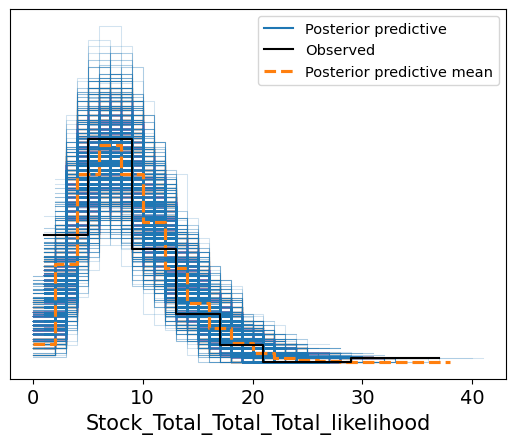

In [91]:
az.plot_ppc(posterior, kind='kde', coords={"Geography": ["US"], "Product": ['Desktops']}, data_pairs={"Stock_Total_Total_Total_likelihood": "Stock_Total_Total_Total_likelihood"});

In [75]:
ft_model.trace

Inference data with groups:
	> posterior
	> sample_stats
	> observed_data
	> constant_data

array([[<Axes: title={'center': 'Promotion_Total_Total_Total_coeff_estimate'}>,
        <Axes: title={'center': 'Promotion_Total_Total_Total_coeff_estimate'}>]],
      dtype=object)

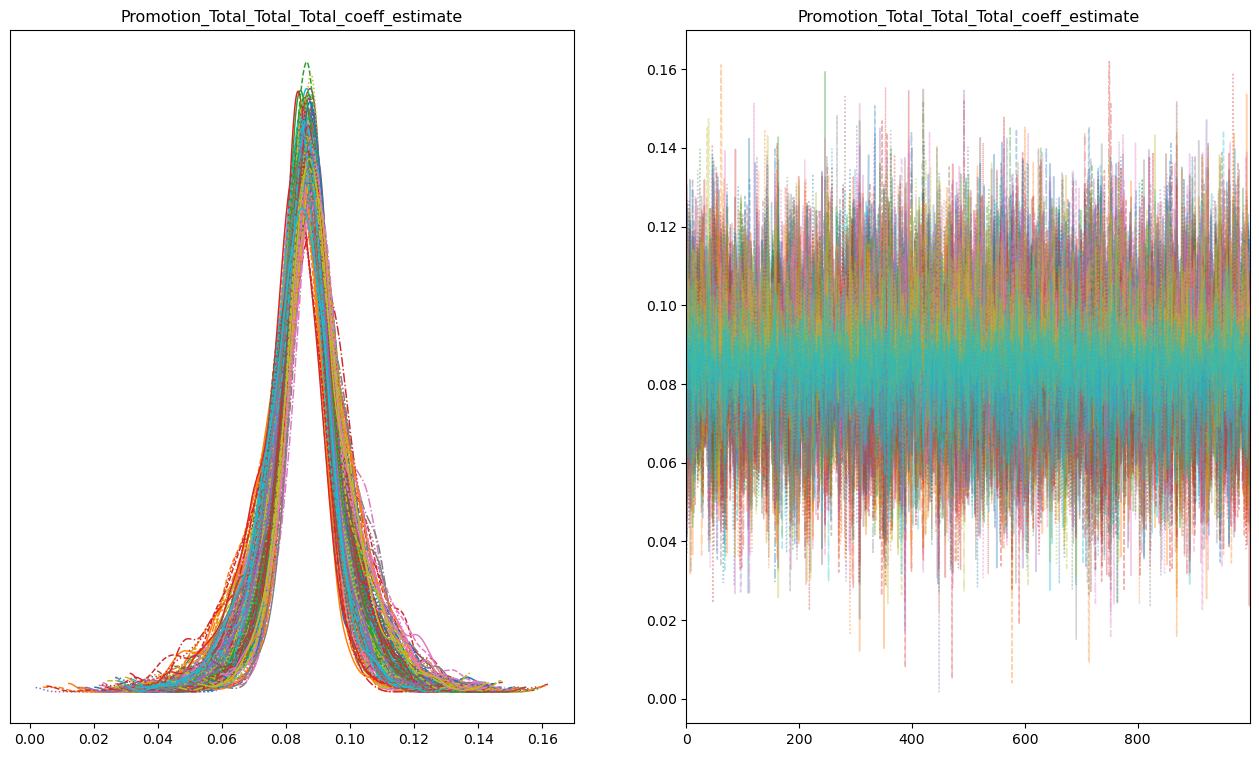

In [76]:
ft_model.plot_posterior("Promotion_Total_Total_Total")

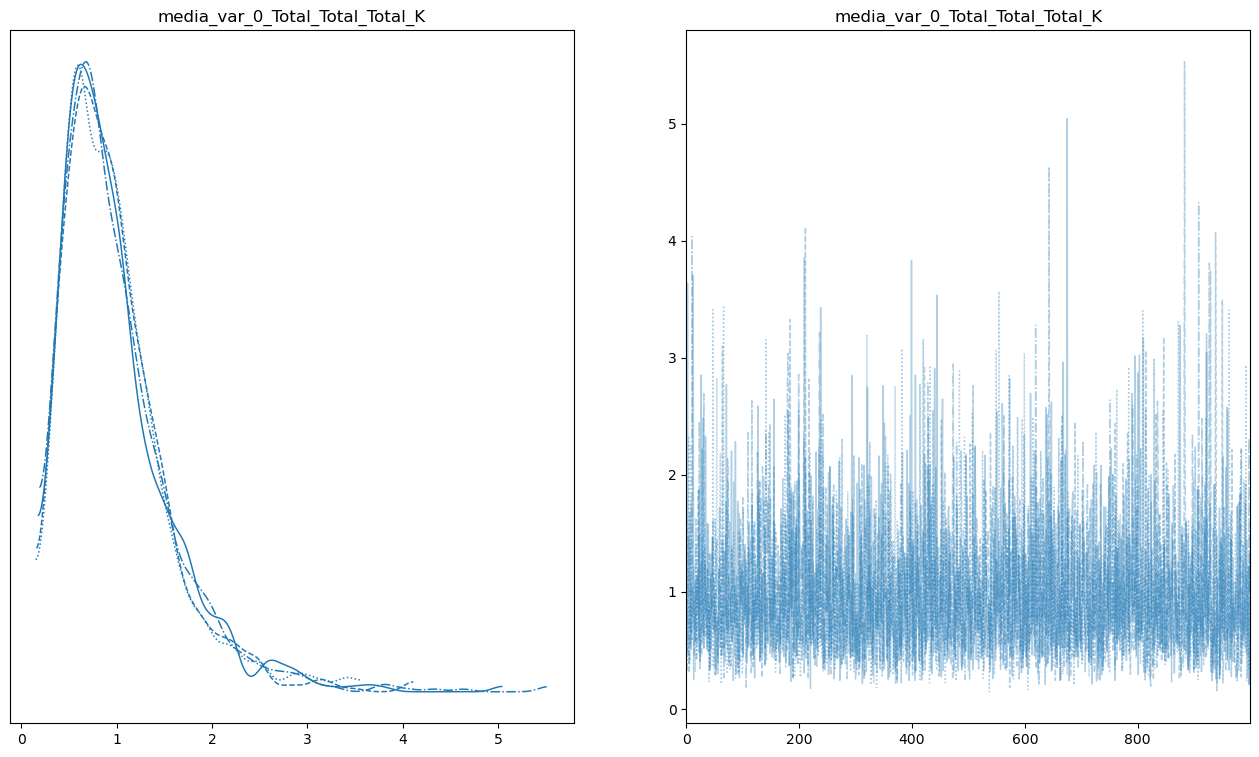

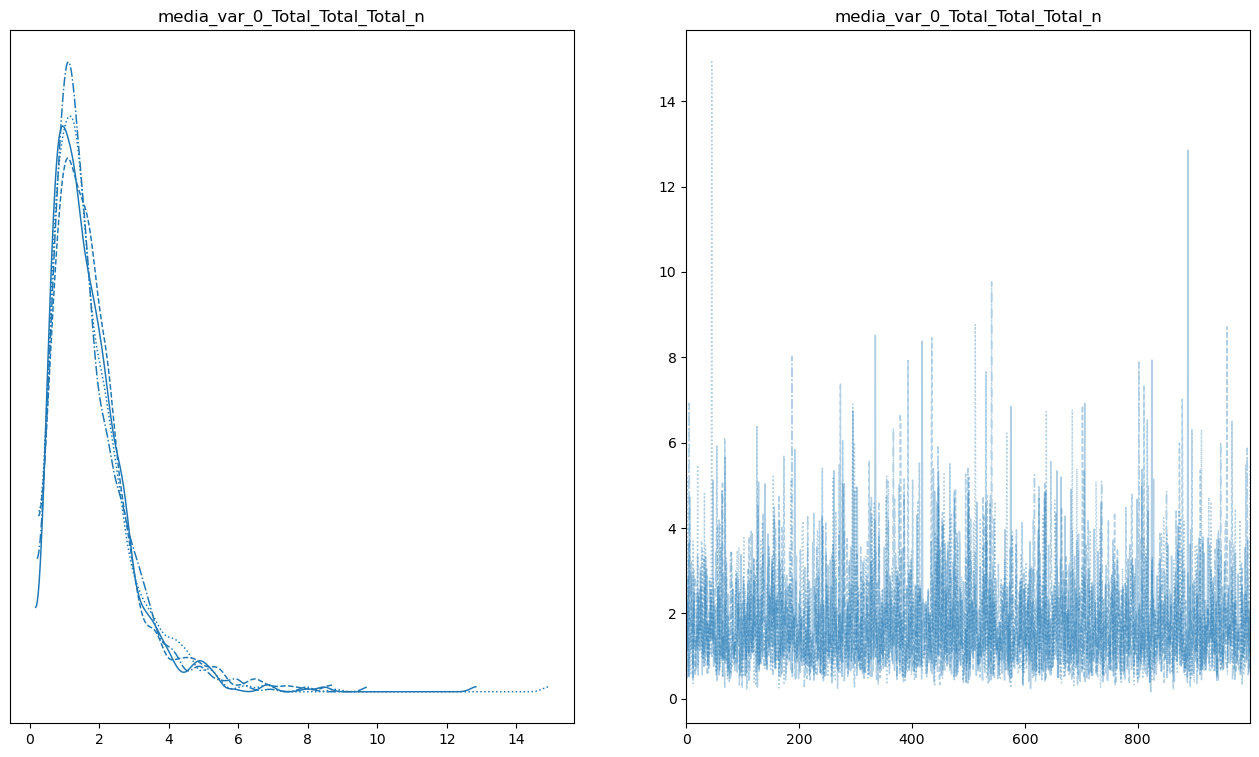

In [63]:
ft_model.check_media_transform_prior('media_var_0_Total_Total_Total')

In [48]:
model = ft_model.build()
with model:
  trace = pm.sample(1000, tune=1000, cores=4)

[10  5  1] intercept
['Geography', 'Product', 'Period']
[ 10   5 156] media_var_0_Total_Total_Total
['Geography', 'Product', 'Period']
[ 10   5 156] Promotion_Total_Total_Total


Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [intercept_fixed_coeff, media_var_0_Total_Total_Total_fixed_coeff, media_var_0_Total_Total_Total_K_, media_var_0_Total_Total_Total_n_, Promotion_Total_Total_Total_fixed_coeff, Promotion_Total_Total_Total_rand_coeff_sigma, Promotion_Total_Total_Total_rand_coeff]


/Users/mreda/miniconda3/envs/foottraffic/lib/python3.11/site-packages/rich/live.py:231: UserWarning: install 
"ipywidgets" for Jupyter support
  warnings.warn('install "ipywidgets" for Jupyter support')

Sampling 4 chains for 1_000 tune and 1_000 draw iterations (4_000 + 4_000 draws total) took 102 seconds.


array([[<Axes: title={'center': 'Promotion_Total_Total_Total_coeff_estimate'}>,
        <Axes: title={'center': 'Promotion_Total_Total_Total_coeff_estimate'}>]],
      dtype=object)

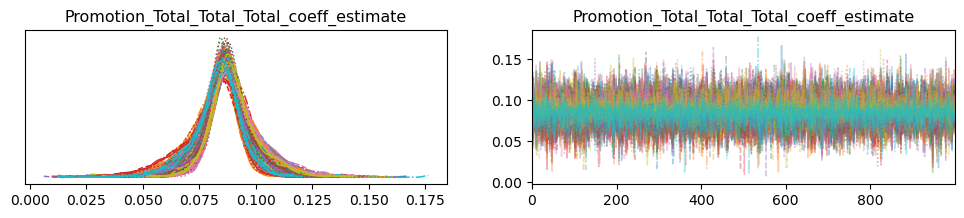

In [54]:
pm.plot_trace(trace, var_names=['Promotion_Total_Total_Total_'])

In [30]:
ft_model.build()

ValueError: Incompatible Elemwise input shapes [(1, 10, 5), (10, 5, None)]

In [7]:
ft_model.variable_details[1] = MediaVariableDetails(
  variable_name='media_var_0_Total_Total_Total',
  variable_type='media',
  media_transform="hill",
  media_transform_prior=HillPrior()
)


In [8]:
MediaVariableDetails(
  variable_name='media_var_0_Total_Total_Total',
  variable_type='media',
  media_transform="hill",
  media_transform_prior=HillPrior()
)

MediaVariableDetails(variable_name='media_var_0_Total_Total_Total', variable_type='media', deterministic_transform=DeterministicTransform(functional_form=<FunctionalForms.linear: 'linear'>, params=None), normalization=<Normilization.none: 'none'>, std=None, mean=None, time_transform=None, sign='positive', partial_pooling_sigma=1, adstock=<Adstock.delayed: 'delayed'>, media_transform=<MediaTransform.hill: 'hill'>, coeff_prior=MediaCoeffPrior(coeff_dist=<PosDist.lognormal: 'LogNormal'>, coeff_params={'mu': -2.995732273553991, 'sigma': 0.26236426446749106}), fixed_ind_coeff_dims=None, random_coeff_dims=None, media_transform_prior=HillPrior(type='Hill', K_ave=0.85, K_std=0.6, n_ave=1.5, n_std=1.2))

In [9]:
SShapedPrior()

SShapedPrior(type='SShaped', alpha_ave=0.88, alpha_std=0.03, beta_ave=100.0, beta_std=1000)

In [10]:
with pm.Model(coords = ft_model.get_coords()) as model:
  K, n = ft_model.variable_details[1].build_media_priors()

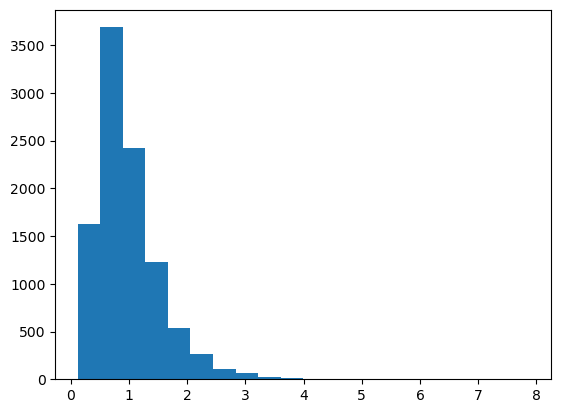

In [11]:
plt.hist(pm.draw(K, 10000), bins=20);

In [30]:
with pm.Model(coords = ft_model.get_coords()) as model:
    # Register Variables
    
    var1 = ft_model.get_variable("Promotion_Total_Total_Total")
    var1.register_variable(ft_model.data)
    var1_contributions = var1.get_contributions()
    var2 = ft_model.get_variable('media_var_0_Total_Total_Total')
    var2.register_variable(ft_model.data)
    var2_contributions = var2.get_contributions()

    sigma = pm.HalfNormal("sigma", sigma=1)
    lik = pm.Normal("lik", mu=var1_contributions, sigma=sigma, observed=obs.reshape(10, 5, -1), dims=("Geography", "Product", "Period"))
    #trace = pm.sample(2000, tune=2000, target_accept=.99)
#test = np.abs(pm.draw(prior, 4000).reshape((200, -1, len(model.coords["Geography"]), len(model.coords["Product"])))[:156, 0,:,:])

In [38]:
data = var2.as_numpy(ft_model.data)
normed_data = data/data.mean(axis=-1)[..., None]

In [39]:
hillTest = pm.draw(var2_contributions, 4000)
hillTest = hillTest.reshape((4, 1000,*hillTest.shape[1:]))

<Axes: >

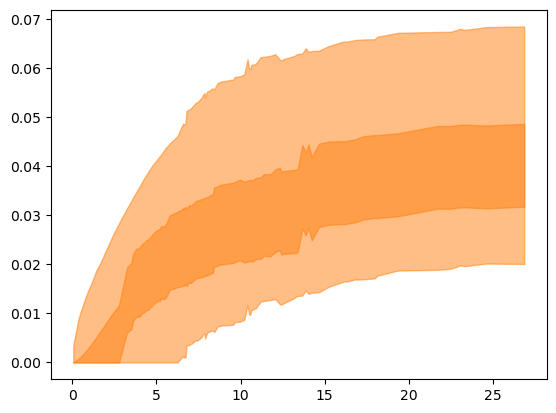

In [41]:
I, J = 1, 0
az.plot_hdi(data[I, J, :], hillTest[:, :, I, J, :], smooth=False)
az.plot_hdi(data[I, J, :], hillTest[:, :, I, J, :], hdi_prob=.5, smooth=False)

In [13]:
with model:
  posterior = pm.sample_posterior_predictive(trace)

Sampling: [lik]


/Users/mreda/miniconda3/envs/foottraffic/lib/python3.11/site-packages/rich/live.py:231: UserWarning: install 
"ipywidgets" for Jupyter support
  warnings.warn('install "ipywidgets" for Jupyter support')

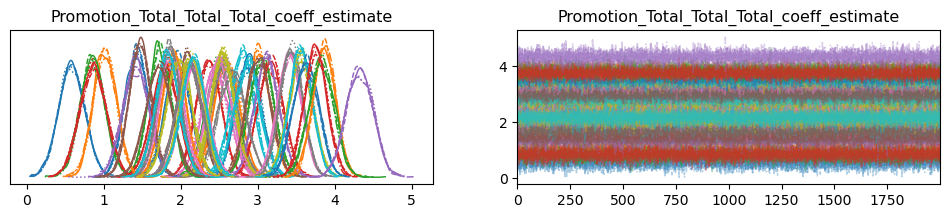

In [14]:
pm.plot_trace(trace, var_names=['Promotion_Total_Total_Total_coeff_estimate']);

In [15]:
pm.summary(trace, var_names=[
  'Promotion_Total_Total_Total_coeff_estimate', 
  'Promotion_Total_Total_Total_fixed_coeff'
])

mean     sd  hdi_3%  \
Promotion_Total_Total_Total_coeff_estimate[AU, ...  1.967  0.163   1.659   
Promotion_Total_Total_Total_coeff_estimate[AU, ...  2.605  0.164   2.290   
Promotion_Total_Total_Total_coeff_estimate[AU, ...  2.498  0.166   2.190   
Promotion_Total_Total_Total_coeff_estimate[AU, ...  2.363  0.163   2.062   
Promotion_Total_Total_Total_coeff_estimate[AU, ...  2.555  0.155   2.275   
Promotion_Total_Total_Total_coeff_estimate[BR, ...  2.103  0.157   1.804   
Promotion_Total_Total_Total_coeff_estimate[BR, ...  2.450  0.175   2.127   
Promotion_Total_Total_Total_coeff_estimate[BR, ...  2.570  0.162   2.267   
Promotion_Total_Total_Total_coeff_estimate[BR, ...  2.550  0.149   2.264   
Promotion_Total_Total_Total_coeff_estimate[BR, ...  2.803  0.155   2.511   
Promotion_Total_Total_Total_coeff_estimate[CA, ...  2.884  0.158   2.605   
Promotion_Total_Total_Total_coeff_estimate[CA, ...  3.013  0.152   2.727   
Promotion_Total_Total_Total_coeff_estimate[CA, ...  3.054  0.160   2.760   
Promotion_Total_Total_Total_coeff_estimate[CA, ...  3.168  0.161   2.866   
Promotion_Total_Total_Total_coeff_estimate[CA, ...  3.121  0.158   2.847   
Promotion_Total_Total_Total_coeff_estimate[DE, ...  1.833  0.161   1.529   
Promotion_Total_Total_Total_coeff_estimate[DE, ...  2.504  0.162   2.205   
Promotion_Total_Total_Total_coeff_estimate[DE, ...  2.668  0.179   2.337   
Promotion_Total_Total_Total_coeff_estimate[DE, ...  2.548  0.158   2.251   
Promotion_Total_Total_Total_coeff_estimate[DE, ...  2.873  0.169   2.549   
Promotion_Total_Total_Total_coeff_estimate[FR, ...  1.431  0.151   1.150   
Promotion_Total_Total_Total_coeff_estimate[FR, ...  1.914  0.151   1.643   
Promotion_Total_Total_Total_coeff_estimate[FR, ...  1.731  0.148   1.459   
Promotion_Total_Total_Total_coeff_estimate[FR, ...  1.802  0.171   1.489   
Promotion_Total_Total_Total_coeff_estimate[FR, ...  2.122  0.171   1.803   
Promotion_Total_Total_Total_coeff_estimate[JP, ...  3.015  0.159   2.726   
Promotion_Total_Total_Total_coeff_estimate[JP, ...  3.418  0.154   3.129   
Promotion_Total_Total_Total_coeff_estimate[JP, ...  3.441  0.147   3.184   
Promotion_Total_Total_Total_coeff_estimate[JP, ...  3.557  0.160   3.249   
Promotion_Total_Total_Total_coeff_estimate[JP, ...  3.560  0.148   3.293   
Promotion_Total_Total_Total_coeff_estimate[KR, ...  0.587  0.167   0.275   
Promotion_Total_Total_Total_coeff_estimate[KR, ...  1.018  0.149   0.748   
Promotion_Total_Total_Total_coeff_estimate[KR, ...  0.855  0.160   0.548   
Promotion_Total_Total_Total_coeff_estimate[KR, ...  0.865  0.170   0.556   
Promotion_Total_Total_Total_coeff_estimate[KR, ...  1.420  0.168   1.107   
Promotion_Total_Total_Total_coeff_estimate[MX, ...  1.474  0.142   1.227   
Promotion_Total_Total_Total_coeff_estimate[MX, ...  1.878  0.160   1.581   
Promotion_Total_Total_Total_coeff_estimate[MX, ...  1.854  0.144   1.584   
Promotion_Total_Total_Total_coeff_estimate[MX, ...  1.982  0.161   1.683   
Promotion_Total_Total_Total_coeff_estimate[MX, ...  1.828  0.155   1.535   
Promotion_Total_Total_Total_coeff_estimate[UK, ...  3.628  0.164   3.320   
Promotion_Total_Total_Total_coeff_estimate[UK, ...  3.867  0.143   3.592   
Promotion_Total_Total_Total_coeff_estimate[UK, ...  3.831  0.163   3.508   
Promotion_Total_Total_Total_coeff_estimate[UK, ...  3.757  0.147   3.491   
Promotion_Total_Total_Total_coeff_estimate[UK, ...  4.328  0.173   4.012   
Promotion_Total_Total_Total_coeff_estimate[US, ...  1.718  0.170   1.400   
Promotion_Total_Total_Total_coeff_estimate[US, ...  2.175  0.169   1.847   
Promotion_Total_Total_Total_coeff_estimate[US, ...  2.116  0.169   1.794   
Promotion_Total_Total_Total_coeff_estimate[US, ...  2.151  0.155   1.858   
Promotion_Total_Total_Total_coeff_estimate[US, ...  2.168  0.159   1.850   
Promotion_Total_Total_Total_fixed_coeff             2.437  0.121   2.214   

                                                    hdi_97%  mcse_mean  \
Promotion_Total_Total_Tota

In [16]:
posterior

Inference data with groups:
	> posterior_predictive
	> observed_data
	> constant_data

<Axes: xlabel='lik'>

/Users/mreda/miniconda3/envs/foottraffic/lib/python3.11/site-packages/IPython/core/events.py:82: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  func(*args, **kwargs)
/Users/mreda/miniconda3/envs/foottraffic/lib/python3.11/site-packages/IPython/core/pylabtools.py:170: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


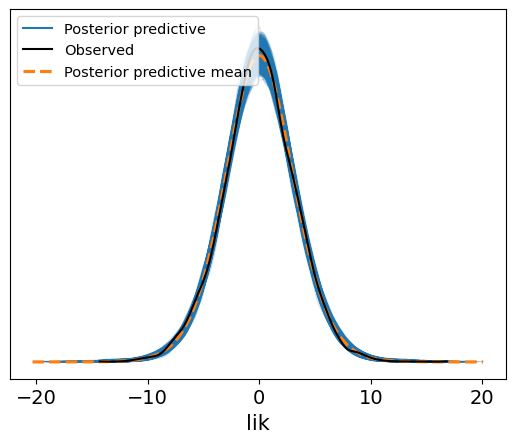

In [17]:
az.plot_ppc(posterior)

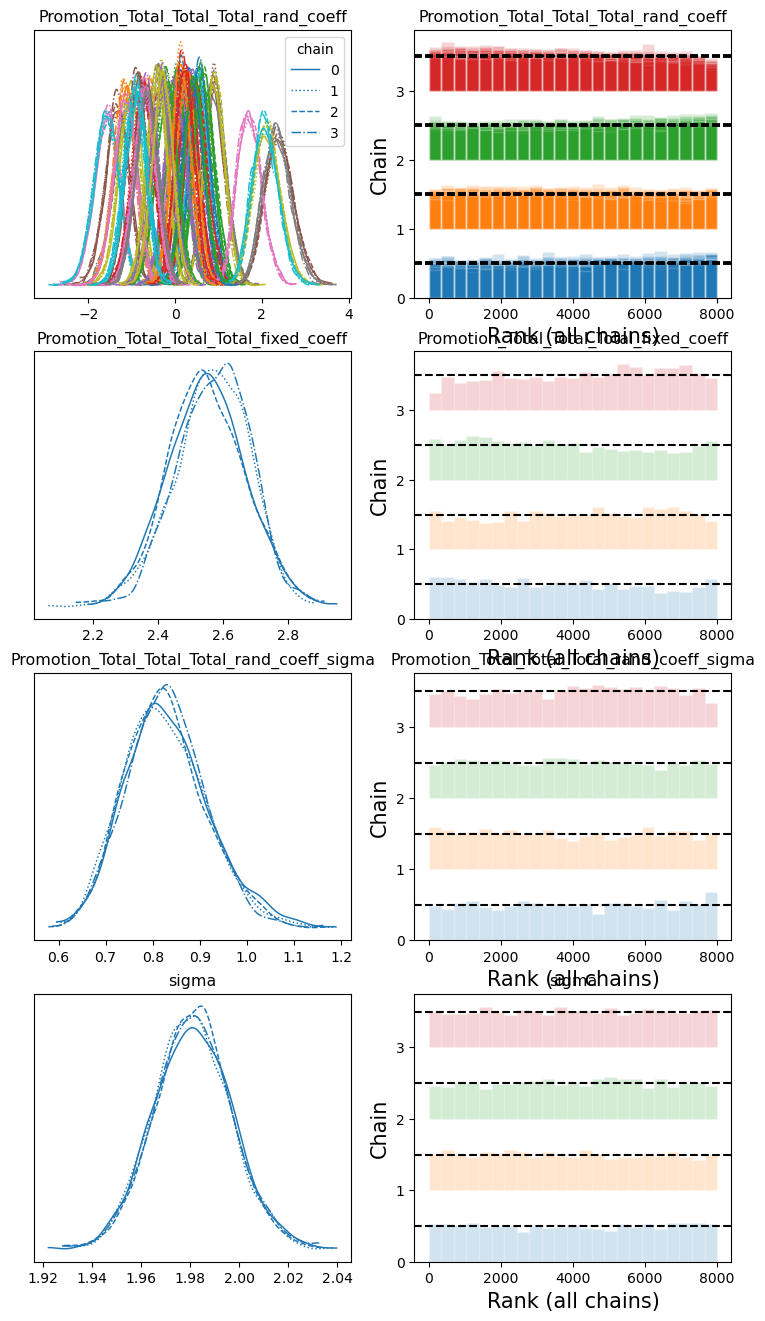

In [26]:
pm.plot_trace(trace, 
              var_names=[
                'Promotion_Total_Total_Total_rand_coeff',
                'Promotion_Total_Total_Total_fixed_coeff',
                'Promotion_Total_Total_Total_rand_coeff_sigma',
                'sigma'
              ],
               figsize=(9, 16), legend=True, kind='rank_bars');

In [1]:
pm.summary(trace, var_names=['Promotion_Total_Total_Total_contributions'])['mean']

NameError: name 'pm' is not defined

In [38]:
with pm.Model(coords = ft_model.get_coords()) as model:
    prior = pm.Normal('geo_fixed', mu=2*(np.arange(10)-5), sigma=1, dims=('Geography',))

In [39]:
prior.shape.eval()

array([10])

In [37]:
len(model.coords['Geography'])

10

In [18]:
test_load.trace

Inference data with groups:
	> posterior
	> sample_stats
	> observed_data

In [17]:
test_load.fitted

True

In [14]:
test_load.data.analytic_dataframe(indexed=True)

Media 1_Outlet_Campaign_Creative  \
Geography Product Period                                         
Canada    Jewelry 2021-12-06                          0.761563   
                  2021-12-13                          0.632769   
                  2021-12-20                         -1.822554   
                  2021-12-27                          0.033166   
                  2022-01-03                         -0.527984   
...                                                        ...   
US        Watch   2022-10-31                         -1.228215   
                  2022-11-07                         -0.019373   
                  2022-11-14                         -0.295459   
                  2022-11-21                          0.047837   
                  2022-11-28                          1.079978   

                              Media 2_Outlet_Campaign_Creative  
Geography Product Period                                        
Canada    Jewelry 2021-12-06                          1.195581  
                  2021-12-13                          0.884852  
                  2021-12-20                          0.779260  
                  2021-12-27                         -0.642591  
                  2022-01-03                         -0.680240  
...                                                        ...  
US        Watch   2022-10-31                          0.257128  
                  2022-11-07                          0.250875  
                  2022-11-14                         -0.874313  
                  2022-11-21                         -0.969215  
                  2022-11-28                         -0.196820  

[208 rows x 2 columns]

In [54]:
def test(x, a:float):
    return x*a

In [12]:
with pm.Model() as model:
    mu = pm.Normal("mu", mu=1, tau=.2)
    pm.Normal("obs", mu=mu, tau=4, observed=np.array([0, .2, -.2]))
    trace = pm.sample()

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [mu]


d:\MattReda\miniforge\envs\foottraffic\Lib\site-packages\rich\live.py:231: UserWarning: install "ipywidgets" for 
Jupyter support
  warnings.warn('install "ipywidgets" for Jupyter support')

Sampling 4 chains for 1_000 tune and 1_000 draw iterations (4_000 + 4_000 draws total) took 34 seconds.


In [18]:
from arviz import InferenceData, convert_to_inference_data

In [23]:
convert_to_inference_data()

Signature: InferenceData.load(self, **kwargs) -> 'Self'
Docstring:
load method is extended from xarray.Dataset methods.



For more info see :meth:`xarray:xarray.Dataset.load`.
In addition to the arguments available in the original method, the following
ones are added by ArviZ to adapt the method to being called on an ``InferenceData`` object.

Other Parameters
----------------
groups: str or list of str, optional
    Groups where the selection is to be applied. Can either be group names
    or metagroup names.
filter_groups: {None, "like", "regex"}, optional, default=None
    If `None` (default), interpret groups as the real group or metagroup names.
    If "like", interpret groups as substrings of the real group or metagroup names.
    If "regex", interpret groups as regular expressions on the real group or
    metagroup names. A la `pandas.filter`.
inplace: bool, optional
    If ``True``, modify the InferenceData object inplace,
    otherwise, return the modified copy.

See Also
---

In [32]:
from io import FileIO, BytesIO

In [34]:
my_file = BytesIO()

In [37]:
type(trace.posterior)

xarray.core.dataset.Dataset

In [41]:
from pydantic import BaseModel, ConfigDict

In [45]:
class Test(BaseModel):
    model_config = ConfigDict(arbitrary_types_allowed=True)
    trace: InferenceData
    file: str

    

In [51]:
Test(trace=trace, file="f").model_dump_json(exclude='trace')

'{"file":"f"}'

In [81]:
variable_1 = VariableDetails(
    variable_name="Media 1_Outlet_Campaign_Creative",
    variable_type="media",
    deterministic_transform= {
        "functional_form": 'linear',
        "params": None
    },
    normalization='Global Standardize'
    )

variable_2 = Media

In [75]:
test_mff.analytic_dataframe()

Geography  Product     Period  Media 1_Outlet_Campaign_Creative  \
0      Canada  Jewelry 2021-12-06                          0.761563   
1      Canada  Jewelry 2021-12-13                          0.632769   
2      Canada  Jewelry 2021-12-20                         -1.822554   
3      Canada  Jewelry 2021-12-27                          0.033166   
4      Canada  Jewelry 2022-01-03                         -0.527984   
..        ...      ...        ...                               ...   
203        US    Watch 2022-10-31                         -1.228215   
204        US    Watch 2022-11-07                         -0.019373   
205        US    Watch 2022-11-14                         -0.295459   
206        US    Watch 2022-11-21                          0.047837   
207        US    Watch 2022-11-28                          1.079978   

     Media 2_Outlet_Campaign_Creative  
0                            1.195581  
1                            0.884852  
2                            0.779260  
3                           -0.642591  
4                           -0.680240  
..                                ...  
203                          0.257128  
204                          0.250875  
205                         -0.874313  
206                         -0.969215  
207                         -0.196820  

[208 rows x 5 columns]

In [79]:
(variable.transform(test_mff))

-2.9890619893754213e-17

In [6]:
with pm.Model(coords=coords) as cubic_model:
  #load media data into model
  media_data_set = pm.Data("impressions", media_cube, dims=("days_from_release", 'movie', 'media'))
  search_iqv = pm.Data("search_iqv", unnormed_iqv_mesh["iqv"][MOVIES].values, dims=("days_from_release", 'movie'))
  
  
  #Prior on average effect of media across campaigns and outlets for impressions
  betas_media_ave = pm.Normal("betas_media_mu_log", np.log(.05), 2, dims=("media"), initval=np.array([-3]*len(MEDIA_VARS)))
  #Prior on expected deviation between outlets and campaigns
  betas_media_reg = pm.HalfNormal("betas_media_sigma", .1, dims=("media"), initval=np.array([.01]*len(MEDIA_VARS)))
  #Prior on individual media effects strictly positive
  betas_media_specific = pm.Deterministic("betas_media_log", 
      pm.Normal(
      'betas_media_log_', 
      mu=0, 
      sigma=1,
      dims=('movie', 'media')
      )*betas_media_reg[None, :] + betas_media_ave[None, :], dims=('movie', 'media'))


  #Priors on shape prameters
  #K_m = pm.Uniform("K_m", .5, 7, dims=("media"))
  K_m = pm.Normal("K_m", mu=np.log(6), sigma=2, dims=("media"))
  k_sigma = pm.HalfNormal("K_sig", .5, dims=("media"))
  K_n = pm.Deterministic(
    "K_n", 
    K_m[None, :] + pm.Normal("K_n_", 0, 1, dims=("movie", 'media'))*k_sigma[None, :],
    dims=("movie", "media")
    )
    
  n_m = pm.Exponential("n_m", 1, dims="media")+.95
  #n = pm.TruncatedNormal(
  #  "n", 
  #  mu=n_m, 
  #  sigma=.01, lower=.8, upper=3, 
  #  dims=("outlet", "campaign", "media")
  #  )
    
  #Priors on decay parameters
  lam = pm.Normal("lam", np.log(6), .5, dims="media")
  lam_sigma = pm.HalfNormal("lam_sig", 3, dims="media")
  lam_n = pm.Deterministic(
    "lam_n", 
    lam[None, :] + pm.Normal("lam_n_", 0, 1, dims=("movie", "media"))*lam_sigma[None, :],
    dims=("movie", "media")
    )
  theta = pm.Normal("theta", np.log(8), 2, dims="media")
  theta_sigma = pm.HalfNormal("theta_sig", 3, dims='media')
  theta_n = pm.Deterministic(
    "theta_n",
    theta[None, :] + pm.Normal("theta_n_", 0, 1, dims=("movie", "media"))*theta_sigma[None, :],
    dims=("movie", 'media')
  )


  media_effect = pm.Deterministic("media_effect", pm.math.exp(betas_media_specific) * adstock.weibull_adstock(
      shape.hill_function(media_data_set, n_m, pm.math.exp(K_n)), 
      pm.math.exp(lam_n), pm.math.exp(theta_n), l_max=20
      ), 
      dims=("days_from_release", "movie", "media"))
    
  total_media_effect = pm.Deterministic("total_media_effect", media_effect.sum(axis=-1), dims=("days_from_release", "movie"))
  #tau = pm.Normal("tau", -4, sigma=2)
  #tau_sigma = pm.HalfNormal("tau_sigma", np.log(1.4))
  #tau_t = pm.Normal("tau_t", tau, sigma=tau_sigma, dims=("days_from_release"))
  spline_betas = pm.Normal("spline_betas", -(np.abs(np.array(knots))/10)+2, sigma=.1, dims='splines')
  spline_sigma = pm.HalfNormal("splines_sigma", 1, dims='splines')

  spline_betas_n = pm.Normal("splines_betas_n", spline_betas, spline_sigma, dims=("movie", "splines"))
  tau_t = pm.Deterministic('tau_t', pm.math.sum(spline_container[:, :, :] * (spline_betas_n[None, :, :]), axis=-1), dims=("days_from_release", "movie"))
  #release_date_effect = pm.Normal('release_date', 0, 1)

  u = pm.Normal("u", -4, sigma=2)
  u_sigma = pm.HalfNormal('u_sigma', 3)
  u_n = pm.Normal("u_n", u, sigma=u_sigma, dims=("movie"))
    #impressions_mu = 
  sigma = pm.HalfNormal('sigma', .1)
  total_effect = pm.Deterministic("total_effect", (total_media_effect + tau_t + u_n), dims=("days_from_release", "movie"))
  impressions_sample = pm.LogNormal('iqv_obs', mu=total_effect, sigma=sigma, observed=search_iqv, dims=("days_from_release", "movie"))

array(0.40401909)

(array([[ 15.,  79., 223., 271., 279., 100.,  32.,   1.,   0.,   0.],
        [  0.,   0.,   4.,  33., 133., 286., 292., 185.,  52.,  15.]]),
 array([-2.94314972, -2.14316181, -1.3431739 , -0.543186  ,  0.25680191,
         1.05678981,  1.85677772,  2.65676562,  3.45675353,  4.25674143,
         5.05672934]),
 <a list of 2 BarContainer objects>)

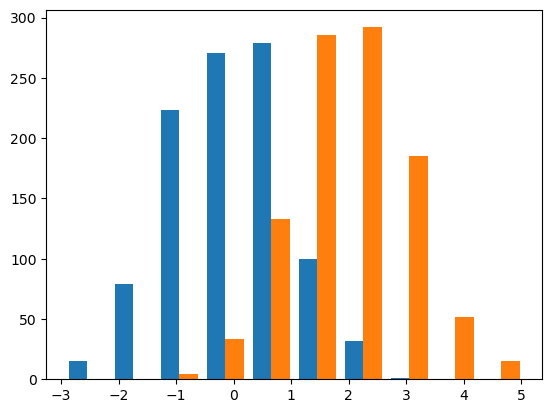

In [15]:
plt.hist(pm.draw(x, 1000), bins=10)

In [52]:
with pm.Model(coords={'Product': ['watch', 'jewelry'], "Period": np.arange(100)}) as model:

    mv_normal = pm.MvNormal("MvNormal", mu=[0, 0], cov=[[1, .2], [.2, 1]], dims=('Period', 'Product'))
    sample = pm.sample(100)


Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [MvNormal]


d:\MattReda\miniforge\envs\foottraffic\Lib\site-packages\rich\live.py:231: UserWarning: install "ipywidgets" for 
Jupyter support
  warnings.warn('install "ipywidgets" for Jupyter support')

Sampling 4 chains for 1_000 tune and 100 draw iterations (4_000 + 400 draws total) took 31 seconds.
The rhat statistic is larger than 1.01 for some parameters. This indicates problems during sampling. See https://arxiv.org/abs/1903.08008 for details
The effective sample size per chain is smaller than 100 for some parameters.  A higher number is needed for reliable rhat and ess computation. See https://arxiv.org/abs/1903.08008 for details


In [54]:
sample

Inference data with groups:
	> posterior
	> sample_stats